In [72]:
import pandas as pd
import os
import numpy as np
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/raw_data/data_mc.csv', header = None)
# df_test = pd.read_csv('/Users/marikhomeriki/code/marikhomeriki/product_review_analysis/raw_data/test_data/test.csv', header=None)
# df_test = df.rename({0: 'label', 1: 'text'}, axis = 1)
df = df.rename({0: 'label', 1: 'text'}, axis = 1)

In [74]:
df = df.dropna()

In [75]:
from nltk.corpus import stopwords 
import string
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize 

def clean (text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
    lowercased = text.lower() # Lower Case
    tokenized = word_tokenize(lowercased) # Tokenize
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    stop_words = set(stopwords.words('english')) # Make stopword list
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    lemma=WordNetLemmatizer() # Initiate Lemmatizer
    lemmatized = [lemma.lemmatize(word) for word in without_stopwords] # Lemmatize
    return lemmatized

In [81]:
df_text = df.label

In [82]:
df_text = pd.DataFrame(df_text)

In [83]:
df_text

,label
0,"I'm not a huge mcds lover, but I've been to be..."
1,Terrible customer service. Î¾I came in at 9:30...
2,"First they ""lost"" my order, actually they gave..."
3,I see I'm not the only one giving 1 star. Only...
4,"Well, it's McDonald's, so you know what the fo..."
...,...
1520,I enjoyed the part where I repeatedly asked if...
1521,Worst McDonalds I've been in in a long time! D...
1522,"When I am really craving for McDonald's, this ..."
1523,Two points right out of the gate: 1. Thuggery ...


In [84]:
df_text['clean_text'] = df_text.label.apply(clean)
df_text['clean_text'] = df_text['clean_text'].astype('str')

In [85]:
df_text

,label,clean_text
0,"I'm not a huge mcds lover, but I've been to be...","['huge', 'mcds', 'lover', 'better', 'one', 'fa..."
1,Terrible customer service. Î¾I came in at 9:30...,"['terrible', 'customer', 'service', 'came', 's..."
2,"First they ""lost"" my order, actually they gave...","['first', 'lost', 'order', 'actually', 'gave',..."
3,I see I'm not the only one giving 1 star. Only...,"['see', 'one', 'giving', 'star', 'star', 'need..."
4,"Well, it's McDonald's, so you know what the fo...","['well', 'mcdonald', 'know', 'food', 'review',..."
...,...,...
1520,I enjoyed the part where I repeatedly asked if...,"['enjoyed', 'part', 'repeatedly', 'asked', 'ri..."
1521,Worst McDonalds I've been in in a long time! D...,"['worst', 'mcdonalds', 'long', 'time', 'dirt',..."
1522,"When I am really craving for McDonald's, this ...","['really', 'craving', 'mcdonald', 'seems', 'cl..."
1523,Two points right out of the gate: 1. Thuggery ...,"['two', 'point', 'right', 'gate', 'thuggery', ..."


In [113]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2))

data_vectorized = vectorizer.fit_transform(df_text['clean_text'])

lda_model = LatentDirichletAllocation(n_components=5)

lda_vectors = lda_model.fit_transform(data_vectorized)

In [115]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [116]:
def get_topics(model, vectorizer):
    topics = {}
    for idx, topic in enumerate(model.components_):
        topics[idx] = [(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]]
    return topics
   

In [117]:
topic = get_topics(lda_model, vectorizer)

In [118]:
topic

{0: [('drive thru', 187.28364848060025),
  ('customer service', 38.20603322662517),
  ('ice cream', 22.21625721009382),
  ('order wrong', 21.200844675575233),
  ('fast food', 20.18763162971549),
  ('parking lot', 19.205152045255986),
  ('every time', 18.205370030413306),
  ('get order', 18.200331047875007),
  ('mcdonald ever', 16.21852261970967),
  ('last time', 16.20332777928664)],
 1: [('drive thru', 46.17380097047247),
  ('fast food', 40.201877830314565),
  ('customer service', 17.201152288772754),
  ('chicken nugget', 15.207052581905236),
  ('big mac', 15.199716789674797),
  ('every time', 11.19744549907991),
  ('order wrong', 10.198943750621927),
  ('order right', 10.19681168204729),
  ('get order', 10.195468131046761),
  ('french fry', 9.201865449485231)],
 2: [('drive thru', 69.13158997826432),
  ('fast food', 30.200774079255456),
  ('big mac', 25.20496242889622),
  ('customer service', 21.194026005539786),
  ('worst mcdonald', 19.199194210175566),
  ('mcdonald ever', 18.1873989

In [15]:
print_topics(lda_model, vectorizer)

Topic 0:
[('food', 86.07588367373073), ('london', 49.16536959312687), ('place', 48.95682946718051), ('service', 46.04695811339066), ('indian', 43.57049759873087), ('dish', 43.48773001434189), ('restaurant', 35.97729663704628), ('naan', 32.96438742352339), ('delicious', 31.61159106991054), ('wait', 31.01260089403546)]
Topic 1:
[('breakfast', 67.68361975742702), ('naan', 46.71787015383095), ('bacon', 38.534845679439556), ('food', 34.70084759539025), ('egg', 30.525784578578893), ('roll', 28.191414301879384), ('indian', 25.904201649509748), ('dishoom', 21.018283410461553), ('came', 20.933540626820204), ('amazing', 20.47950608568313)]
Topic 2:
[('food', 150.92207330238654), ('chicken', 144.88442834063744), ('naan', 104.69756848675166), ('line', 102.18816779286124), ('good', 98.91131168655438), ('dish', 98.605806075053), ('get', 95.8669815665093), ('indian', 85.45614242813377), ('wait', 85.15859623603644), ('great', 74.546358216264)]
Topic 3:
[('wait', 30.8986839918849), ('time', 30.15315468

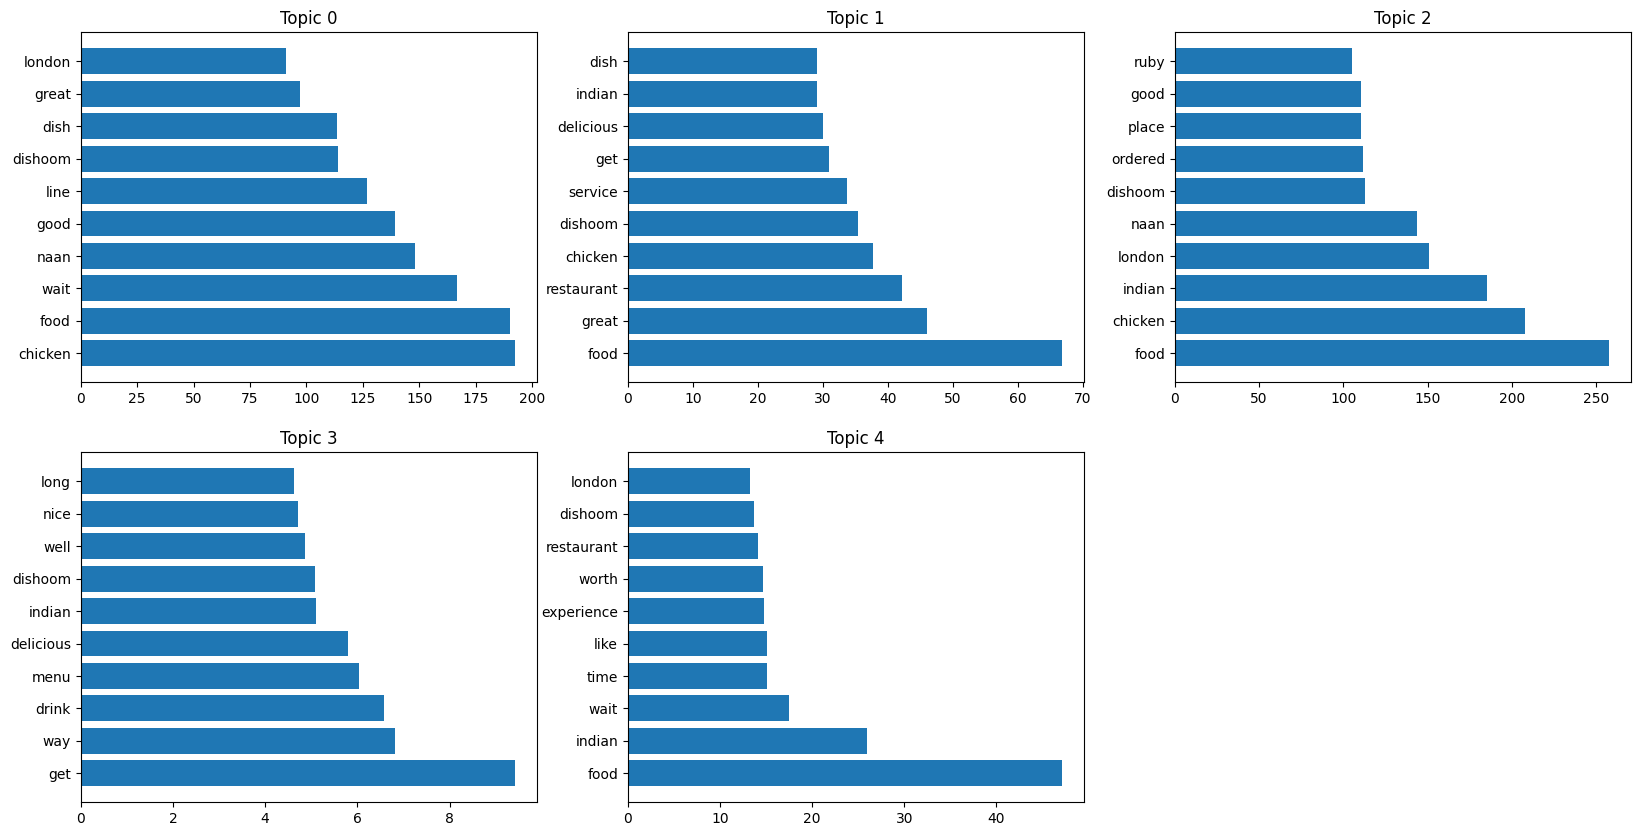

In [151]:
fig = plt.figure(figsize=(20,10))

for key in topic.keys():
    plt.subplot(2, 3, key + 1)
    words = [tup[0] for tup in topic[key]]
    scores = [tup[1] for tup in topic[key]]
    plt.barh(words, scores)
    plt.title(f"Topic {key}")
    

plt.show()